In [28]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import numpy as np


# Create an oval (ellipse) polygon
angle = np.linspace(0, 2*np.pi, 100)
ellipse_x = center.x + semi_major_axis * np.cos(angle)
ellipse_y = center.y + semi_minor_axis * np.sin(angle)
ellipse_points = list(zip(ellipse_x, ellipse_y))
oval = Polygon(ellipse_points)

# Create a curved line that goes through the oval
curve_points = [Point(x, np.sin(x)+0.6) for x in np.linspace(start_point.x, end_point.x, 100)]
curve = LineString(curve_points)

# Create GeoDataFrames
oval_gdf = gpd.GeoDataFrame(geometry=[oval])
curve_gdf = gpd.GeoDataFrame(geometry=[curve])

# Print the GeoDataFrames
print("Oval GeoDataFrame:")
print(oval_gdf)
print("\nCurve GeoDataFrame:")
print(curve_gdf)


Oval GeoDataFrame:
                                            geometry
0  POLYGON ((2.00000 0.00000, 1.99597 0.06342, 1....

Curve GeoDataFrame:
                                            geometry
0  LINESTRING (-2.00000 -0.30930, -1.95960 -0.325...


In [29]:
from shapely.ops import split

# Split the oval along the curve
split_polygons = split(oval, curve)
# Convert the GeometryCollection object to a list


split_polygons = list(split_polygons.geoms)


intersection_line = curve.intersection(oval)
print(intersection_line.length)


2.7566946302186146


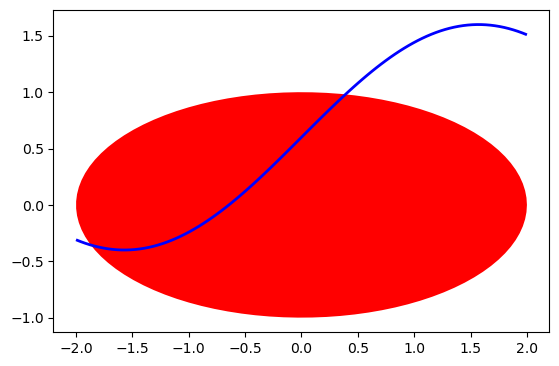

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame with the split polygons
split_gdf = gpd.GeoDataFrame(geometry=split_polygons)

# Create a GeoDataFrame with the curve line
curve_gdf = gpd.GeoDataFrame(geometry=[curve])

# Plot the split polygons in different colors
split_gdf.plot(color='red', ax=plt.gca())

# Plot the curve line with a thicker line
curve_gdf.plot(color='blue', linewidth=2, ax=plt.gca())

# Show the plot
plt.show()
